In [325]:
from sklearn import datasets, tree, cross_validation

import numpy as np

In [409]:
boston = datasets.load_boston()

In [410]:
index = int(len(boston.data) * 0.75)
train_data = boston.data[:index]
test_data = boston.data[index:]
train_labels = boston.target[:index]
test_labels = boston.target[index:]

In [411]:
tree_regressors = [tree.DecisionTreeRegressor(max_depth=5, random_state=42) for i in range(50)]



In [482]:
def gbm_train(X, labels, algo_list, coef):
    y = np.zeros_like(labels)
    y += labels
    for tr in algo_list:
        tr.fit(X, y)
        predicted = tr.predict(X)
        y -= coef*predicted
#         print('p: ', predicted[:4])
#         print('h: ', y[:4])
    return algo_list

In [483]:
def gbm_predict(X, algo_list, coef):
    res = np.zeros(X.shape[0])
    for i in range(len(trained_algo)):
        res += coef*trained_algo[i].predict(X)
#         print(res[:4])
#         print(trained_algo[i].predict(test_data)[:4])
    return res
#     return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(algo_list, coef_list)]) for x in X]

In [493]:
trained_algo = gbm_train(train_data, train_labels, tree_regressors, 0.04)
predicted = gbm_predict(test_data, trained_algo, 0.04)

In [494]:
from sklearn import metrics
print('mse:', metrics.mean_squared_error(test_labels, predicted))
print('r2 :', metrics.r2_score(test_labels, predicted))

mse: 16.8376225224
r2 : 0.418362183208


In [495]:
print(test_labels[:4])
print(predicted[:4])

[ 10.2  10.4  10.9  11.3]
[ 12.12936911  13.14451478  12.63652432  12.71526332]


In [481]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


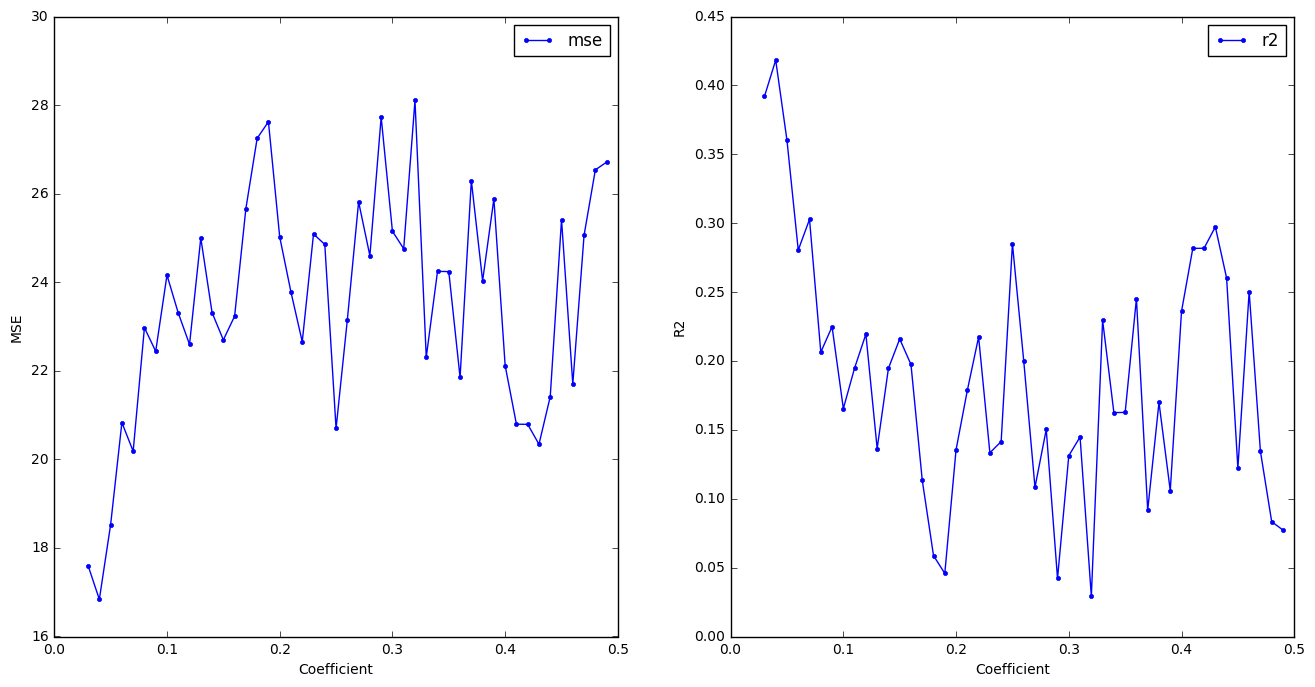

In [499]:
pyplot.figure(figsize=(16, 8))

pred = lambda k: gbm_predict(test_data, gbm_train(train_data, train_labels, tree_regressors, k), k)

coef = np.arange(0.03, 0.5, 0.01)
pyplot.subplot(1, 2, 1)
pyplot.plot(coef, [metrics.mean_squared_error(test_labels, pred(k)) for k in coef], marker='.', label='mse')
pyplot.xlabel('Coefficient')
pyplot.ylabel('MSE')
pyplot.legend(loc='upper right')

pyplot.subplot(1, 2, 2)
pyplot.plot(coef, [metrics.r2_score(test_labels, pred(k)) for k in coef], marker='.', label='r2')

pyplot.xlabel('Coefficient')
pyplot.ylabel('R2')
pyplot.legend(loc='upper right')



